In [4]:
import xarray as xr
import geopandas as gpd
from shapely.geometry import box
import rioxarray

In [5]:
# Define bounding box coordinates
minx, miny, maxx, maxy = -113.0208333332375, 41.9791666666035, -110.9791666665545, 44.0208333332865
geom = box (minx, miny, maxx, maxy)

# Create a GeoDataFrame with CRS
gdf = gpd.GeoDataFrame({'geometry': [geom]}, crs='EPSG:4269')
print(gdf)

                                            geometry
0  POLYGON ((-110.97917 41.97917, -110.97917 44.0...


In [7]:
ds = xr.open_dataset("raw_water_years/ppt_wy2016.nc")
print(ds)

<xarray.Dataset> Size: 42MB
Dimensions:  (lat: 621, lon: 1405, time: 12)
Coordinates:
  * lat      (lat) float64 5kB 24.08 24.12 24.17 24.21 ... 49.83 49.88 49.92
  * lon      (lon) float64 11kB -125.0 -125.0 -124.9 ... -66.58 -66.54 -66.5
  * time     (time) datetime64[ns] 96B 2015-10-01 2015-11-01 ... 2016-09-01
    crs      |S1 1B ...
Data variables:
    ppt      (time, lat, lon) float32 42MB ...


In [8]:
gdf =gdf.to_crs(ds.rio.crs)

In [9]:
clipped = ds.rio.clip(gdf.geometry, gdf.crs, drop=True)

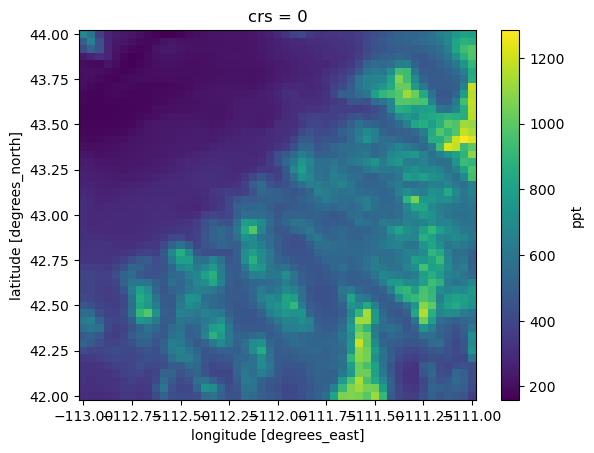

In [10]:
clipped.ppt.sum(dim='time').plot(cmap='viridis')

In [11]:
non_irr_mon = [1, 2, 3, 4, 5]      # Nov to Mar
irr_mon     = [0, 6, 7, 8, 9, 10, 11]  # Oct + Apr to Sep

In [13]:
ppt = clipped['ppt']

In [14]:
irr_sum = ppt.isel(time=irr_mon).sum(dim='time')
nirr_sum = ppt.isel(time=non_irr_mon).sum(dim='time')
tot_sum = clipped.ppt.sum(dim='time')

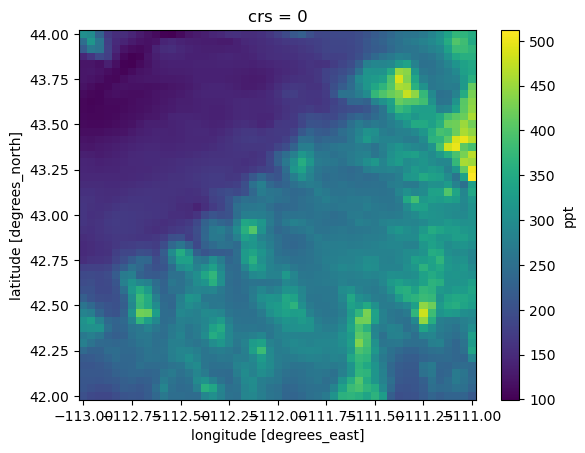

In [15]:
irr_sum.plot(cmap='viridis')